<a href="https://colab.research.google.com/github/Aatmaj-Zephyr/handtype/blob/main/handtype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the 'Pillow' library for image processing
!pip install Pillow

In [ ]:
import matplotlib.pyplot as plt
import random as random
import numpy as np  # Import the 'numpy' library for numerical operations
from PIL import Image, ImageDraw, ImageFont
from PIL import Image   # Import the 'Image' module from the Pillow library

<ipython-input-37-c62dd4911208>:27: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  fontsize = font.getsize(word)[1]
<ipython-input-37-c62dd4911208>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + line_spacing)
<ipython-input-37-c62dd4911208>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + line_spacing)
<ipython-input-37-c62dd4911208>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + line_spacing)
<ipython-input-37-c62dd4911208>:67: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  y += int(font.getsize(i)[1] + 

['What  are  different  \n', 'techniques  to  gather information  for \n', 'software   development? Ans:   \n', 'Different  techniques   for  \n', 'software    development  information \n', 'gathering  include   interviews,  \n', 'surveys,   workshops, observations,   \n', 'prototypes,  focus   groups,  document \n', 'analysis,  user stories,   use  \n', 'cases,    and  more. These methods  \n', 'involve    interacting  with   \n', 'stakeholders,    users, and  existing \n', 'systems  to   understand needs,  \n', 'preferences,  and   requirements,  \n', 'ultimately   guiding   the  software \n', 'development    process.  2.  List  \n', 'verification   and   validation  \n', 'techniques    for  requirements.  Ans: \n', 'Verification    and  validation \n', 'techniques    for   requirements  \n', 'include  reviewing  documents   for \n', 'errors,   walkthroughs   with \n', 'stakeholders,   prototyping,  \n', 'simulations,    traceability analysis,   \n', 'use    case   testing, model  \n

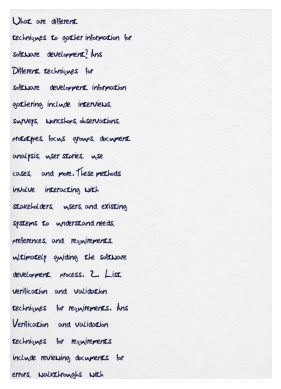

In [ ]:
image_path = "input_image2.jpeg"
image = Image.open(image_path)

output_path = "output_image.jpg"

text = (
    "1. What are different techniques to gather information for software development? \n"
    "Ans: Different techniques for software development information gathering include interviews, surveys, workshops, observations, prototypes, focus groups, document analysis, user stories, use cases, and more. These methods involve interacting with stakeholders, users, and existing systems to understand needs, preferences, and requirements, ultimately guiding the software development process. \n"
    "2. List verification and validation techniques for requirements. \n"
    "Ans: Verification and validation techniques for requirements include reviewing documents for errors, walkthroughs with stakeholders, prototyping, simulations, traceability analysis, use case testing, model validation, acceptance testing, and gathering user feedback. These methods ensure accurate and aligned requirements also."
)

font_path = "custom_font.ttf"
font_size = 50

font = ImageFont.truetype(font_path, font_size)

def wrap_text(text, font, max_width):
    words = text.split()
    wrapped = []
    current_line_width = 0
    current_line = []

    for word in words[1:]:
        for i in range(0, random.randint(1, 3)):
            word += " "

        fontsize = font.getsize(word)[1]

        if current_line_width + len(word) * fontsize <= max_width:
            current_line.append(word)
            current_line_width += len(word) * fontsize
        else:
            current_line.append("\n")
            wrapped.append("".join(current_line))
            current_line = []
            current_line.append(word)
            current_line.append(" ")
            current_line_width = 0

    return wrapped

text_width = image.width * 1.5

text = wrap_text(text, font, text_width)

draw = ImageDraw.Draw(image)

x = 10
y = 10

text_color = (0, 0, 50)

line_spacing = 8

for i in text:
    draw.text((x, y), i, font=font, fill=text_color)
    y += int(font.getsize(i)[1] + line_spacing)

image.save(output_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Load the input images
input_image_path = 'output_image.jpg'   # Path to the modified image
overlay_image_path = 'overlay.jpeg'  # Path to the overlay image

input_image = Image.open(input_image_path)  # Open and load the modified image
overlay_image = Image.open(overlay_image_path)  # Open and load the overlay image

# Convert the images to numpy arrays for image blending
input_array = np.array(input_image)  # Convert the input image to a numpy array
overlay_array = np.array(overlay_image)  # Convert the overlay image to a numpy array

# Resize the overlay image to match the size of the input image
overlay_array_resized = np.array(overlay_image.resize(input_image.size, Image.ANTIALIAS))

# Define the transparency level (alpha channel) for blending
alpha = 0.5

# Blend the images using numpy to create the final output image
output_array = (input_array * (1 - alpha) + overlay_array_resized * alpha).astype(np.uint8)

# Create a PIL image from the numpy array
output_image = Image.fromarray(output_array)

# Save and display the final output image
output_image.save('output_image_final.jpg')  # Save the final image
output_image.show()  # Display the final image

<ipython-input-39-23a3d5f4edcd>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  overlay_array_resized = np.array(overlay_image.resize(input_image.size, Image.ANTIALIAS))
